# Self response absolute

$$ r_{i} (t,\tau) = \log m_{i}(t + \tau) - \log m_{i}(t) = \log \frac{m_{i}(t + \tau)}{m_{i}(t)} $$
$$ R_{ii}^{(exc. 0)}(\tau) = \left \langle \vert r_i(t,\tau) \vert  \right \rangle_t^{(exc. 0)} $$

In [1]:
# Import modules

from matplotlib import pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [5]:
# Using the only two common stocks in both data sets
ticker_i = 'AAPL'
days = ['07', '08', '09', '10', '11']
tau_val = 1000
t_step = 100

In [6]:
def self_response_abs(ticker_i, day, tau_val, t_step):
    """
    Obtain the self response using the average of the absolute value of the
    midpoint log return of ticker i during different time lags. The data
    is adjusted to use only the values each t_step ms
        :param ticker_i: String of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param day: String of the day to be analized (i.e '07')
        :param tau_val: Maximum time lag to be analyzed
        :param t_step: Time step in the data in ms
    """

    print('Self response absolute value data')
    print('Processing data for the stock i ' + ticker_i + ' the day '
          + day + ' March, 2016')
    print('Time step: ', t_step, 'ms')

    # Load data
    midpoint_i = pickle.load(open(
                '../Data/midpoint_data/midpoint_201603{}_{}.pickl'.format
                (day, ticker_i), 'rb'))
    time = pickle.load(open('../Data/midpoint_data/time.pickl', 'rb'))

    # Setting variables to work with t_step ms accuracy

    # Array of the average of each tau. 10^3 s used by Wang
    cross_response_tau = np.zeros(tau_val)

    # Using values t_step millisecond
    midpoint_i_sec = midpoint_i[::t_step]
    # Changing time from 1 ms to t_step ms
    time_t_step = time[::t_step]

    # Calculating the midpoint log return and the cross response functions

    for tau in range(1, tau_val):

        # Every second have a log-return
        log_return_i_sec = 0. * time_t_step

        # Obtain the midpoint log return. Displace the numerator tau values to
        # the right and compute the return, and append the remaining values of
        # tau with zeros
        log_return_i_sec = np.append(np.log(
            midpoint_i_sec[tau:]/midpoint_i_sec[:-tau]), np.zeros(tau))

        cross_response_tau[tau] = np.mean(np.abs(log_return_i_sec))

    # Saving data

    pickle.dump(cross_response_tau, open(
     '../Data/self_response_abs_data_{}ms/self_abs_201603{}_{}i_{}ms.pickl'
     .format(t_step, day, ticker_i, t_step), 'wb'))

    print('Cross response functions data saved')
    print()

    return None

In [7]:
# Generating data to plot the results
for day in days:
    self_response_abs(ticker_i, day, tau_val, t_step)

Self response absolute value data
Processing data for the stock i AAPL the day 07 March, 2016
Time step:  100 ms
Cross response functions data saved

Self response absolute value data
Processing data for the stock i AAPL the day 08 March, 2016
Time step:  100 ms
Cross response functions data saved

Self response absolute value data
Processing data for the stock i AAPL the day 09 March, 2016
Time step:  100 ms
Cross response functions data saved

Self response absolute value data
Processing data for the stock i AAPL the day 10 March, 2016
Time step:  100 ms
Cross response functions data saved

Self response absolute value data
Processing data for the stock i AAPL the day 11 March, 2016
Time step:  100 ms
Cross response functions data saved



In [5]:
self1 = pickle.load(open('../Data/self_response_abs_data_100ms/self_abs_20160309_AAPLi_100ms.pickl', 'rb'))

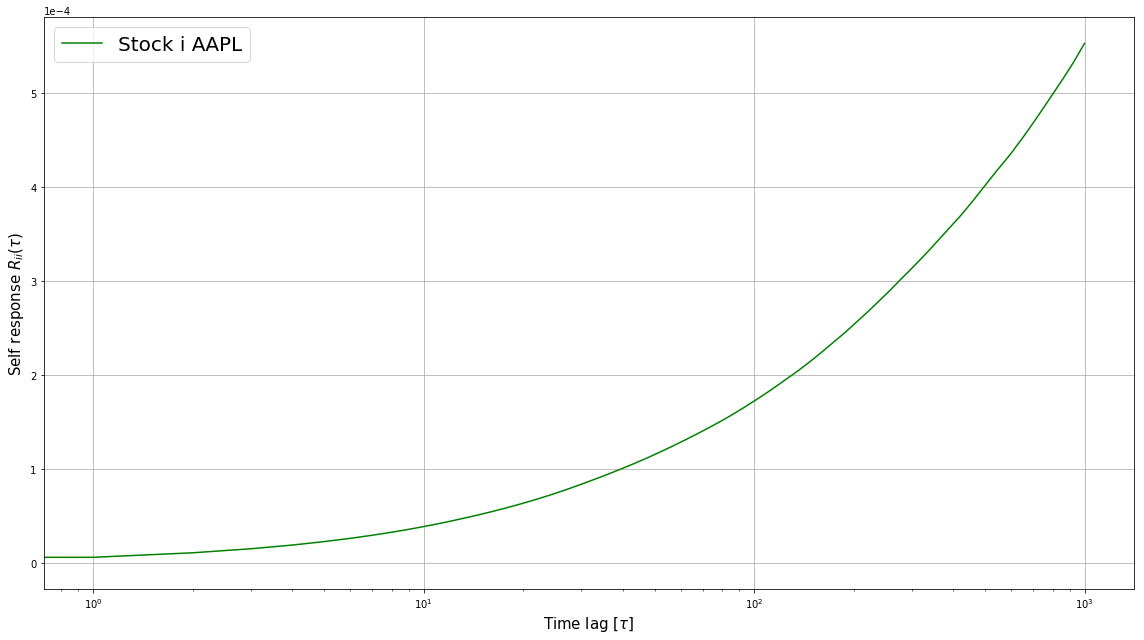

In [6]:
plt.figure(figsize=(16,9))

plot1 = plt.semilogx(self1, '-g', label='Stock i {}'.format(ticker_i))
plt.xlabel(r'Time lag $[\tau]$', fontsize=15)
plt.ylabel(r'Self response $ R_{ii} (\tau) $', fontsize=15)
plt.legend(loc='best', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()